# OilyGiant mining company:  finding the best place for a new well.

The main goal of this project is to build a model that will help to pick the region with the highest profit margin. For training and testing the model we will use the following data:

### Data description

Geological exploration data for the three regions are stored in files. We have data on oil samples from three regions. Parameters of each oil well in the region are already known. 

geo_data_0.csv
geo_data_1.csv
geo_data_2.csv

**The features stored are as follows:**

- id — unique oil well identifier

- f0, f1, f2 — three features of points (their specific meaning is unimportant, but the features themselves are significant)

- product — volume of reserves in the oil well (thousand barrels).


**There are some conditions that must be considered before structuring our analysis**


a) Only linear regression is suitable for model training (the rest are not sufficiently predictable).

b) When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.

c) The budget for development of 200 oil wells is 100 USD million.

d) One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).

e) After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.

f) The data is synthetic: contract details and well characteristics are not disclosed.

**Steps to choose the location:**

To the aim of properly selecting the location, we will:

1) Collect the oil well parameters in the selected region: oil quality and volume of reserves;

2) Build a model for predicting the volume of reserves in the new wells; Analyze potential profit and risks using the Bootstrapping technique.

3) Pick the oil wells with the highest estimated values;

4) Pick the region with the highest total profit for the selected oil wells.





### 1) Download and prepare the data

In [1]:
#Import libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from scipy import stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
# Load datasets into Dataframes
try:
    df0=pd.read_csv('c:/Users/josef/Practicum/Machine learning in business/geo_data_0.csv')
except:
    df0=pd.read_csv('/datasets/geo_data_0.csv')
    



In [3]:
# Load datasets into Dataframes
try:
    df1=pd.read_csv('c:/Users/josef/Practicum/Machine learning in business/geo_data_1.csv')
except:
    df1=pd.read_csv('/datasets/geo_data_1.csv')



In [4]:
# Load datasets into Dataframes
try:
    df2=pd.read_csv('c:/Users/josef/Practicum/Machine learning in business/geo_data_2.csv')
except:
    df2=pd.read_csv('/datasets/geo_data_2.csv')

In [5]:
#Print first five rows of geo 0
df0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [6]:
#Print first five rows of geo 1
df1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [7]:
#Print first five rows of geo 2
df2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [8]:
#Print info about geo 0
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
#Print info about geo 1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
#Print info about geo 2

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
#Check for duplicates

df0.duplicated().sum()

0

In [12]:
#Check for duplicates

df1.duplicated().sum()

0

In [13]:
#Check for duplicates

df2.duplicated().sum()

0


## Conclusion

From an overall data view, we can tell that the datasets are ready to start developing the model:

- 1) Columns are correctly named, using lowercase characters and with no spacing between words. 

- 2) There are no missing values or duplicated rows.

- 3) There are no data types to be changed.

As for object type columns ('id'), we can safely dispose it in all datasets, as it serves as a unique identificator rather than an input to predict revenue or profitability.



In [14]:
#Drop id in all datasets
df0.drop('id', axis=1, inplace=True)
df1.drop('id', axis=1, inplace=True)
df2.drop('id', axis=1, inplace=True)

### 2) Train and test the model for each region

Recall from the descirption that only linear regression is suitable for model training (the rest are not sufficiently predictable).

Below, we will create a linear regression classifier and train it using the 75% of the dataset corresponding to each region, testing the predictions made for the remaining 25%.

For each model, we will print the average reserves for each well based on the validation target values, the average predicted reserves, and the model RMSE (Root mean squared error). We will use that evaluation metric for assessing model performance since, unlike MAE, the RMSE metric is more sensitive to large values: significant errors strongly affect the final RMSE value.


In [15]:
def train_linear_regression(df):
    
    '''Takes a dataframe with geological exploration data for a specific region and the region identifier.
    First, it trains a linear regression model using the 75% of the information stored.
    Then, it makes predictions of product reserves in each point for the remaining 25%, and compares them to
    the actual target values.
    Finally, it prints the average value of the real reserves (validation set - 25%), and the predicted reserves, as well
    as the model RMSE and MAE scores, and returns:
    
    features_train (features used for training the model)
    target_train (the target used for training)
    features_valid (features used for making predictions)
    target_valid (target used for scoring the model)
    '''
    
    #Separate features and target
    features=df.drop('product', axis=1)
    target= df['product']
    
    #Split into train and validation dataset
    features_train,features_valid,target_train,target_valid= train_test_split(features, target, test_size=0.25,random_state=12345)
    
    
    #Create model 
    model = LinearRegression()

    # features scaling
    scaler = StandardScaler()
    scaler.fit(features_train)

    # transform the training set and the test set using transform()
    features_train = scaler.transform(features_train)
    features_valid  = scaler.transform(features_valid)

    #train with training dataset for geo_0
    model.fit(features_train, target_train)

    #make predictions with validation set
    predicted_valid= pd.Series(model.predict(features_valid), index=target_valid.index)
    


    #print average volume of reserves:
    print(f'Average value of reserves: {round(target_valid.mean(),2)}')

    #print average volume of predicted reserves
    print(f'Average value of predicted reserves: {round(predicted_valid.mean(),2)}')

    #print model RMSE (root mean squared error)
    print(f'Model RMSE is {round(mean_squared_error(predicted_valid, target_valid)**0.5,2)}')

    #print model MAE (mean absolute error)

    print(f'Model MAE is: {round(mean_absolute_error(target_valid, predicted_valid),2)}')
    
    return features_train, features_valid, target_train, target_valid, predicted_valid

#### 2.a) Geo_data_0

In [16]:
#Train model with df0
features_train0, features_valid0, target_train0, target_valid0, predicted_valid0 = train_linear_regression(df0)

Average value of reserves: 92.08
Average value of predicted reserves: 92.59
Model RMSE is 37.58
Model MAE is: 30.92


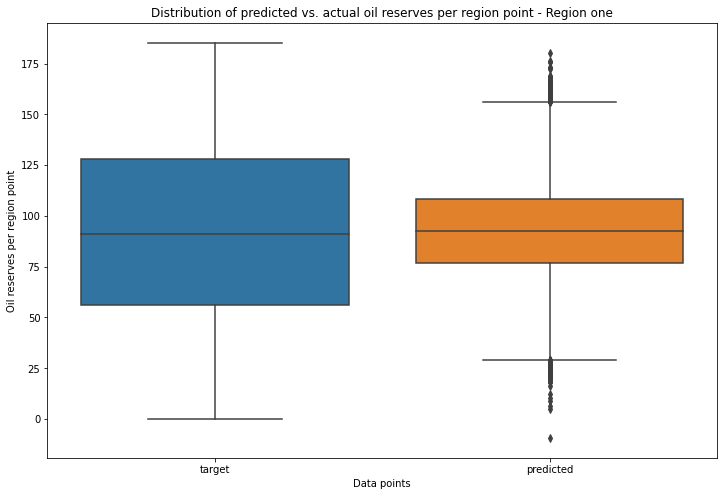

In [17]:
#PLot distribution of predicted vs real oil reserves for region one
plt.figure(figsize=(12,8))
sns.boxplot(data=pd.DataFrame({'target':target_valid0, 'predicted': predicted_valid0}))

plt.title('Distribution of predicted vs. actual oil reserves per region point - Region one')
plt.xlabel('Data points')
plt.ylabel('Oil reserves per region point');

<AxesSubplot:>

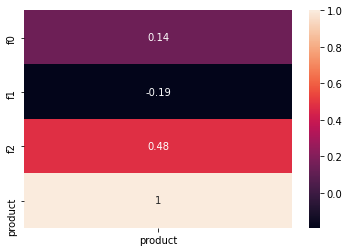

In [18]:
#concatenate features train and target train values
train_set0=pd.concat([pd.DataFrame(features_train0, columns=['f0','f1','f2'], index=target_train0.index), target_train0], axis=1)

#Calculate correlation between features and target in train set
correlation0= pd.DataFrame(train_set0.corr()['product'])    

#plot heatmap
sns.heatmap(correlation0, annot=True)

#### 2.b) Geo_data_1

In [19]:
#Train model with df1
features_train1, features_valid1, target_train1, target_valid1, predicted_valid1 = train_linear_regression(df1)

Average value of reserves: 68.72
Average value of predicted reserves: 68.73
Model RMSE is 0.89
Model MAE is: 0.72


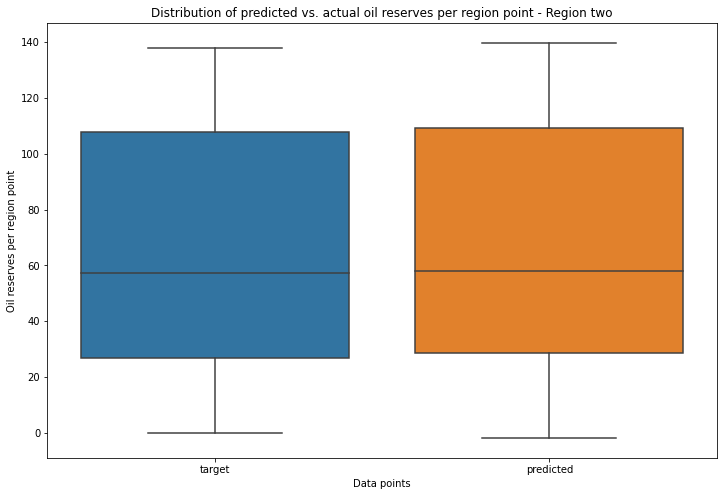

In [20]:
#PLot distribution of predicted vs real oil reserves for region two
plt.figure(figsize=(12,8))
sns.boxplot(data=pd.DataFrame({'target':target_valid1, 'predicted': predicted_valid1}))

plt.title('Distribution of predicted vs. actual oil reserves per region point - Region two')
plt.xlabel('Data points')
plt.ylabel('Oil reserves per region point');

<AxesSubplot:>

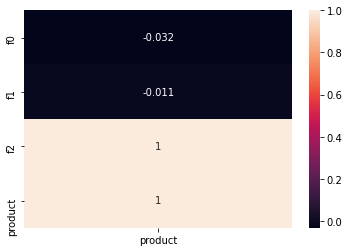

In [21]:
#concatenate features train and target train values
train_set1=pd.concat([pd.DataFrame(features_train1, columns=['f0','f1','f2'], index=target_train1.index), target_train1], axis=1)

#Calculate correlation between features and target in train set
correlation1= pd.DataFrame(train_set1.corr()['product'])    

#plot heatmap
sns.heatmap(correlation1, annot=True)

#### 2.c) Geo_data_2

In [22]:
#Train model with df2
features_train2, features_valid2, target_train2, target_valid2, predicted_valid2 = train_linear_regression(df2)

Average value of reserves: 94.88
Average value of predicted reserves: 94.97
Model RMSE is 40.03
Model MAE is: 32.79


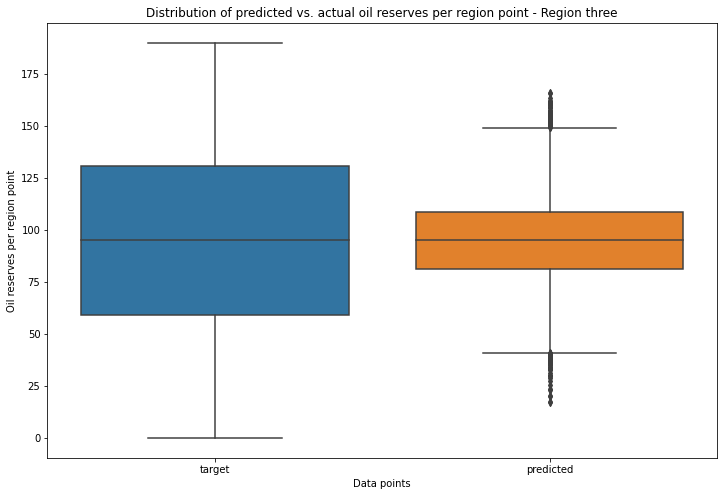

In [23]:
#PLot distribution of predicted vs real oil reserves for region two
plt.figure(figsize=(12,8))
sns.boxplot(data=pd.DataFrame({'target':target_valid2, 'predicted': predicted_valid2}))

plt.title('Distribution of predicted vs. actual oil reserves per region point - Region three')
plt.xlabel('Data points')
plt.ylabel('Oil reserves per region point');

<AxesSubplot:>

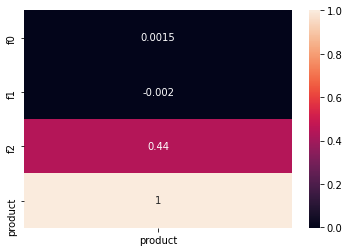

In [24]:
#concatenate features train and target train values
train_set2=pd.concat([pd.DataFrame(features_train2, columns=['f0','f1','f2'], index=target_train2.index), target_train2], axis=1)

#Calculate correlation between features and target in train set
correlation2= pd.DataFrame(train_set2.corr()['product'])    

#plot heatmap
sns.heatmap(correlation2, annot=True)

Based on the predictions made by each model, we can say that the second region has the lowest dispersion in predictions (RMSE = 0.89), but also the lowest average predicted reserves (68.7 thousand barrels). From the correlation plot, we can easily realize that the reason the model is accurately predicting product is its perfect correlation to f2 column values, boosted by the nule correlation to the other two features. The third region has the highest values for both metrics (RMSE=40.03 and average predicted reserves= 94.97 thousand barrels), and the first one is quite close to the latter, with an RMSE of 37.58 and an average predicted reserve of 92.59. In both of the the last two models (one and three), correlation to f2 is way weaker (0.44 and 0.48), what makes it more difficult for the model to accurately predict the reserves in each region point.

The boxplots depict the difference in the product dispersion between the target validation set and the predictions. In region 2, we see they are almost the same, whereas in the others predictions stick to a considerably narrower range than the real target values. 

**What we can conclude is that in the regions where the average product is higher, predictions are less accurate, making the decision more risky.**

Moving forward, we will calculate the revenue estimated for each well, and set the minimum level of reserves we need for developing a new well without losses. Then, we'll compare that threshold with the average volume of reserves in each region.

### 3) Profit calculation

We know from the conditions specified in the contract that:

- a) The budget for development of 200 oil wells is 100 USD million.

- b) One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).

Based on the abovementioned, after storing all key values for calculations in separate variables we will calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region

In [25]:
#Store the cost of each individual well (100 USD million / 200 oil wells).
WELL_COST= 100000000/200

#Store unit revenue (1k barrels).
UNIT_REVENUE = 4500

#Calculate the min level of reserves required for developing a new well without losses.
MIN_RESERVES= WELL_COST/UNIT_REVENUE
MIN_RESERVES

111.11111111111111

In [26]:
#Double check the break even point is reached

print(f'Revenue (at break-even): {MIN_RESERVES*UNIT_REVENUE}')

print(f'Cost (at break-even):{WELL_COST}')

print(f'Profit:{MIN_RESERVES*UNIT_REVENUE-WELL_COST}')

Revenue (at break-even): 500000.0
Cost (at break-even):500000.0
Profit:0.0


#### Conclusion

The minimum volume of reserves for developing a new well without lossess is 111.11 thousand barrels. As compared to such benchmark, we can say that both predicted and target average for every region fall short of expectation. However, that average has been calculated based on 25 k region points, while we're actually aiming to detect the 200 points with higher product reserves. 

**To assess what the real profit would have been if we had chosen those 200 points based on our predictions, we will:**

- a) Define a function to calculate profit as follows:


     - Sort predictions from highest to lowest. Then get the target values that correspond to the first 200 region points.
        
     - Sum the real (validation target) product of those 200 region points, and multiply the sum by USD 4,500 (price per thousand barrels)
        
     - Subtract the cost of for developing 200 oil wells (100 USD million).
     
        
- b) Use it to calculate what the profit per region would have been.

### 4) Calculate profit from a set of selected oil wells and model predictions

As explained above, in this section we aim to:

4.1. Pick the wells with the highest values of predictions.

4.2. Summarize the target volume of reserves in accordance with these predictions

4.3. Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

In [27]:
#Write a function to calculate target profit of the top 200 wells sorted by predicted reserves

def profit(predictions,target, count):
    ''' Takes predicted oil reserves and sorts them from highest to lowest. 
    Then it selects the target values corresponding to the first n (count) predictions and calculates their profitability,
    considering a cost of development of 100 Million USD.'''
    
    predictions_sorted = predictions.sort_values(ascending=False)
    
    target_selected = target[predictions_sorted.index][:count]
    
    target_revenue= target_selected.sum()*4500
    cost= 100000000
    target_profit=target_revenue-cost
    
    return target_profit

In [28]:
#Calculate profit for region one 
print('Profit for region one would have been: USD',round(profit(predicted_valid0, target_valid0,200),0))

Profit for region one would have been: USD 33208260.0


In [29]:
#Calculate profit for region two
print('Profit for region two would have been: USD',round(profit(predicted_valid1, target_valid1,200),0))

Profit for region two would have been: USD 24150867.0


In [30]:
#Calculate profit for region three
print('Profit for region three would have been: USD',round(profit(predicted_valid2, target_valid2,200),0))

Profit for region three would have been: USD 27103500.0


#### Conclusion

If our decision was to be made only considering profitability, we would recommend the company to choose region one to build the 200 oil wells. But since we also must take risk into consideration, and keep only the regions with the risk of losses lower than 2.5%, we must first evaluate what that percentage is in each region before selecting one of them.


**The final step will hence consist of properly assessing risk of losses in each region and discard those where it's higher than 2.5% before selecting the most profitable location**

### 5) Calculate risks and profit for each region:

In order to evaluate risk of loss in each location, we will:

5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit. When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.

5.2. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.

After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.

5.3. Provide findings: suggest a region for development of oil wells and justify the choice.

In [31]:
#Define function for bootstraping (1000 samples)
def profit_bootstraping(features_train, features_valid,target_train, target_valid, predicted_valid):

    #Define random state
    state = np.random.RandomState(12345)
    
    #Add empty list to store profit of each sample
    values = []
    
    #Loop through 1000 samples of 500 randomly selected datapoints, picking the top 200 with the highest predicted product.
    for i in range(1000):

        #Get a random selection of 500 data points with replacement (one point can be selected more than once)
        target_subsample= target_valid.sample(n=500, replace=True, random_state=state)

        #Get the predictions that correspond to the previously selected target points
        pred_subsample=predicted_valid[target_subsample.index]

        #Calculate profit for the top 200 performing wells (based on predictions) out of the 500 selected
        profit_sample= profit(pred_subsample,target_subsample,200)

        #Store profit in list
        values.append(profit_sample)

    #Convert list to series    
    values = pd.Series(values)

    #Calculate average profit for the 1000 samples
    avg_profit= values.mean()

    #Calculate the 95% confidence interval (the range within which the average of the total population (25k region points)
    # has a 95% of probabilities to fall )
    
    lower = round(values.quantile(0.025),2)
    upper = round(values.quantile(0.975),2)
    

    #Get the count of times when the profit was negative (out of the 1000 samples)
    losses= (values < 0).mean()*100

    print("Average profit:", round(avg_profit,2))
    print(f"95% Confidence interval: ({lower}, {upper})")
    print(f"Risk of losses: {losses}%")

    return values

In [32]:
#Region One
values0=profit_bootstraping(features_train0, features_valid0,target_train0, target_valid0, predicted_valid0)

Average profit: 4259385.27
95% Confidence interval: (-1020900.95, 9479763.53)
Risk of losses: 6.0%


In [33]:
#REGION TWO
values1=profit_bootstraping(features_train1, features_valid1,target_train1, target_valid1, predicted_valid1)

Average profit: 5152227.73
95% Confidence interval: (688732.25, 9315475.91)
Risk of losses: 1.0%


In [34]:
#REGION THREE
values2=profit_bootstraping(features_train2, features_valid2,target_train2, target_valid2, predicted_valid2)


Average profit: 4350083.63
95% Confidence interval: (-1288805.47, 9697069.54)
Risk of losses: 6.4%


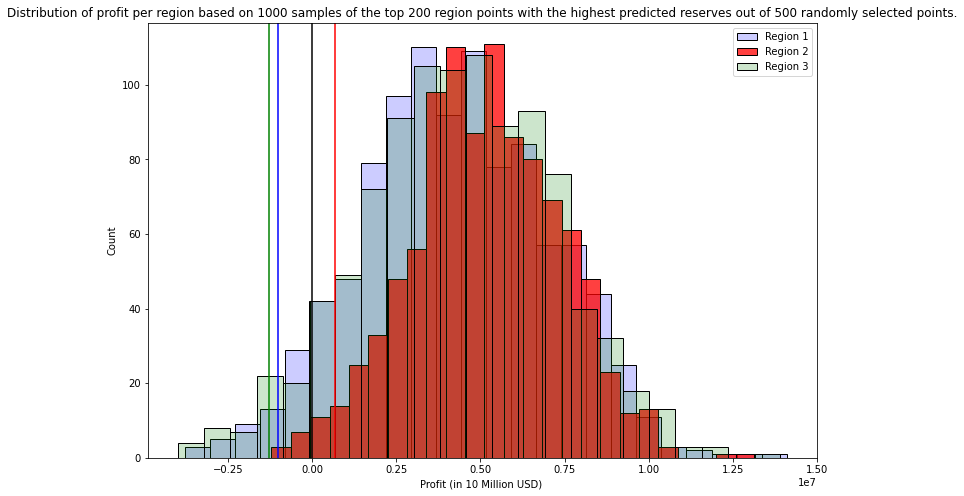

In [35]:
#Plot a histogram with each 

#set figure size
plt.figure(figsize=(12,8))

#add histogram ploting count of average profit for each region based on the 1000 samples analyzed above
sns.histplot(values0, color='blue', label='Region 1', alpha=0.20)
sns.histplot(values1, color='red', label='Region 2')
sns.histplot(values2, color='green', label='Region 3',alpha=0.20)

#add vertical line in profit= 0€
plt.axvline(0, c="black")

#add vertical line in the 2.5th quantile for the profit values corresponding to each region.
plt.axvline(values0.quantile(0.025), c='blue')
plt.axvline(values1.quantile(0.025), c='red')
plt.axvline(values2.quantile(0.025), c='green')

#add legend to visualize what region each plot corresponds to 
plt.legend()

#add title
plt.title('Distribution of profit per region based on 1000 samples of the top 200 region points with the highest predicted reserves out of 500 randomly selected points.')

#add x label
plt.xlabel('Profit (in 10 Million USD) ')

#show plot
plt.show()

#### Conclusion

After properly assessing risk of loss, we can confirm that REGION 2 is not only the one with the highest average predicted profit, but also the only one that meets our risk policy criteria.

In the plot, we can see that it is the only one where the 0.025 quantile is to the right of the break even point (at which profit is 0 USD).

Also, it's evident that the highest count of samples threw a higher profit than in the other two regions (the peaks are the ones more to the right as well).

Based on risk and profitability assessment, we can confidently recommend the company to choose region 2 to develop 200 oil wells in the points where the predicted product reserves are the highest.

### OVERALL SUMMARY

After importing and getting an overview of geological exploration data for the three regions stored in files we concluded that the datasets were ready to start developing the model after disposing the "ID" column.

As specified on the general assumptions, only linear regression was deemed suitable for model training (the rest are not sufficiently predictable).

We trained a Linear regression model with the 75% of each dataset, and assessed its performance using the remaining 25%, through RMSE and MAE scores. 

The second region got the lowest RMSE (0.89) and MAE (0.72), but also the lowest average predicted and real product (68.73 thousand barrels, based on 25 k region points). From a correlation plot between validation features and target, we realized that the reason the model could accurately predict oil reserves in each point was its perfect correlation to f2 column values in region 2, boosted by the nule correlation between product and the other two features.

As for the other two regions, their predicted and real reserves were around 92 and 94 k barrels, but the RMSE was almost half as high, denoting the high inaccuracy of the predictions.


Next, we depicted the difference in product reserves dispersion between the target validation set and the predictions through boxplots. In region 2, we noticed they were almost the same, whereas in the others, predictions sticked to a considerably narrower range than the real target values.


The following step consisted of calculating the minimum predicted product reserves we needed for covering the cost of developing 200 oil wells, which turned out to be 111.11 thousand barrels. The average reserves per region point were lower than that average, but we still had to estimate the profitability of the 200 region points with the highest predicted target.


Region ONE would have been the one with the highest profit (USD 33,208,260) if we had made our decision based on the predictions for the entire validation set.

However, since we were also required to take risk into consideration, and keep only the regions whrtr the risk of loss was lower than 2.5%, we proceeded to properly assess such risk and discard the regions where it was higher than the aforementioned threshould before selecting the most profitable location.


We used the bootstrapping technique with 1000 samples to find the distribution of profit. When exploring the region, a study of 500 points was carried, with picking the best 200 points for the profit, 95% confidence interval and risk of losses calculation.

### Conclusion

After properly assessing risk of loss, we can confirm that REGION 2 is not only the one with the highest average predicted profit (USD 5,153,228) based on the 1000 samples analyzed, but also the only one that meets our risk policy criteria (risk of loss is 1%, whereas the other two are close to the 6%)

From the combination of risk and profitability assessment, we can confidently recommend the company to choose REGION TWO to develop 200 oil wells in the points where the predicted product reserves are the highest.
